# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [187]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from scipy import stats


In [182]:
# Your code here.

student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

In [15]:
student_data.reindex().index += 1
student_data

,Age,Tardies
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0
10,30,3


Draw a dispersion diagram (scatter plot) for the data.

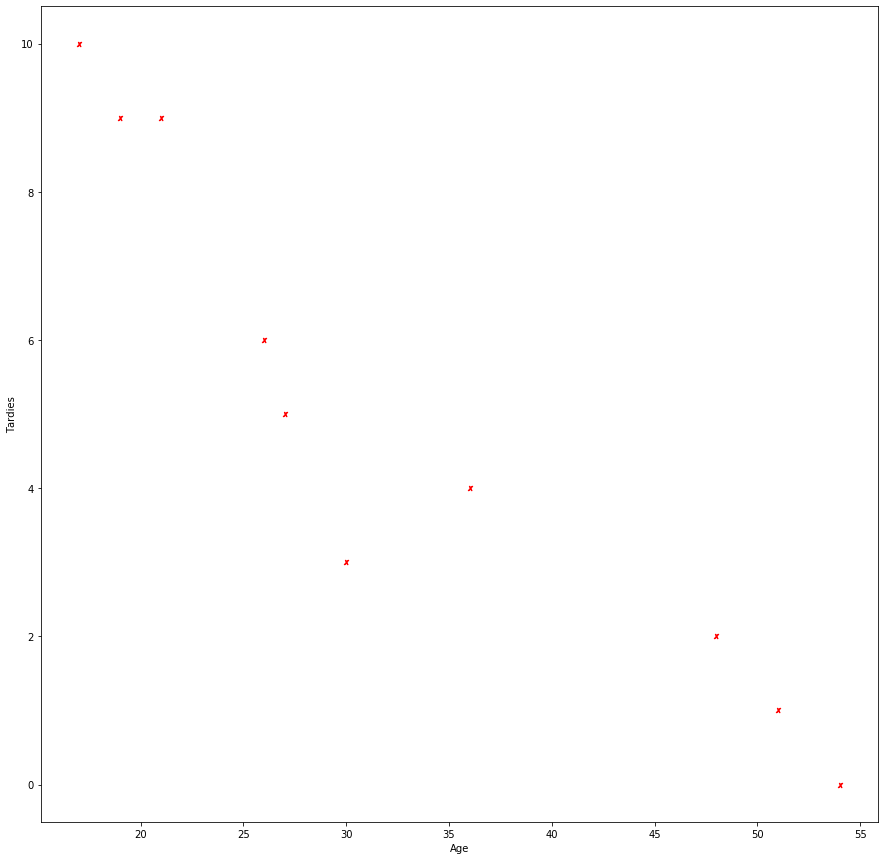

In [26]:
# Your code here.
student_data.plot.scatter(x = 'Age', y = 'Tardies', marker = '$X$', c = 'r', s = 20, figsize = (15,15))

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

[[ 8.76085026]
 [ 0.50494405]
 [ 6.33264255]
 [ 7.78956717]
 [ 4.14725561]
 [ 1.23340636]
 [ 8.27520872]
 [ 6.57546332]
 [-0.22351827]
 [ 5.60418024]]


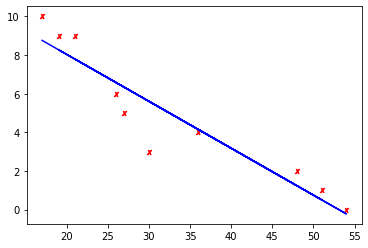

In [87]:
# Your response here.
lm = LinearRegression()

X = student_data.iloc[:, 0].values.reshape(-1, 1)
Y = student_data.iloc[:, 1].values.reshape(-1, 1)
reg = lm.fit(X, Y)
reg.predict(X)
Y_pred = lm.predict(X)
print(Y_pred)
plt.scatter(X, Y, marker = '$X$', c = 'r', s = 20)
plt.plot(X, Y_pred, color='b')

##Yes, I see a trend. age is negatively correlated with tardies

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [86]:
# Your response here.
#correlation:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [89]:
#covariance:
student_data.cov()

##covariance and correlation are similar measures of deviation from the sample towards the expected value of the variable. covariance is correlation expressed in terms of the value of the variable unit.
##One can say correlation is the covariance but immune to dimension since it's expressed in absolute terms.
##correlation is covariance/(stdevXvar*stdevYvar)

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [285]:
# Your response here.
## did it above. Used linear model since we only have one dependent var and one predictor with a shape that seems to be linear (didn't do any extra tests to see if logs or exponential fits better but it doesn't look like it). outcome variable is tardiness, predictor is age

Plot your regression model on your scatter plot.

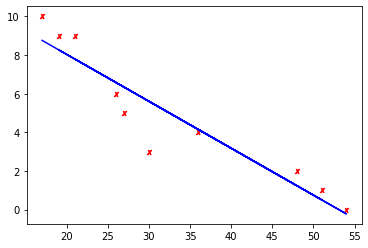

In [94]:
# Your code here.
plt.scatter(X, Y, marker = '$X$', c = 'r', s = 20)
plt.plot(X, Y_pred, color='b')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [120]:
#coefficient of age and r**2
print(reg.coef_, r2_score(Y, Y_pred))

## In this model that accounts for no other explicative variables, 88% of tardiness is explained by age. Model shows that for every 4 years of age, the individual gets to one more class on time

[[-0.24282077]] 0.8820265558250109


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [141]:
# Import any libraries you may need & the data
path = '../../../datasets/vehicles/vehicles.csv'
vehicles = pd.read_csv(path)
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [148]:
# Your response here.
v_pol = vehicles[['CO2 Emission Grams/Mile', 'Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG']]
v_pol

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG
0,522.764706,1984,4.0,19.388824,17
1,683.615385,1984,6.0,25.354615,13
2,555.437500,1985,4.0,20.600625,16
3,683.615385,1985,6.0,25.354615,13
4,555.437500,1987,6.0,20.600625,16
...,...,...,...,...,...
35947,244.000000,2013,3.0,9.155833,36
35948,243.000000,2014,3.0,9.155833,36
35949,244.000000,2015,3.0,9.155833,36
35950,246.000000,2016,3.0,9.155833,36


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [143]:
v_pol.isna().sum()
v_pol.dtypes

CO2 Emission Grams/Mile    float64
Year                         int64
Cylinders                  float64
Fuel Barrels/Year          float64
Combined MPG                 int64
dtype: object

In [ ]:
# Your response here. 
lm = LinearRegression()

X = student_data.iloc[:, 0].values.reshape(-1, 1)
Y = student_data.iloc[:, 1].values.reshape(-1, 1)
reg = lm.fit(X, Y)
reg.predict(X)
Y_pred = lm.predict(X)
print(Y_pred)

In [193]:
# Your response here. 
lm = LinearRegression()

X = v_pol.loc[:, 'CO2 Emission Grams/Mile'].values.reshape(-1, 1)
Y = v_pol.loc[:, ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG']].values.reshape(-1, 4)
reg = lm.fit(X, Y)
reg
reg.predict(X)
Y_pred = lm.predict(X)
Y_pred
print(Y_pred)
print('Coefficients are: ', reg.coef_.reshape(1,4), 'R**2 is: ', r2_score(Y, Y_pred))

[[1999.82293036    6.29138436   19.36477854   18.04221534]
 [1996.79405601    8.07557879   25.31670614   11.64489382]
 [1999.20769026    6.65379885   20.57376384   16.74275941]
 ...
 [2005.07216695    3.19925916    9.04970024   29.12919032]
 [2005.03450625    3.22144364    9.12370587   29.04964671]
 [2004.86503311    3.3212738     9.45673118   28.69170048]]
Coefficients are:  [[-0.01883035  0.01109224  0.03700281 -0.0397718 ]] R**2 is:  0.6114949945707526


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [216]:
# Your response here.
import statsmodels.api as sm
mod = sm.OLS(X,Y)
#fii = mod.fit().summary2()
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
p_values
fii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          6.920e+06
Date:                Tue, 11 Feb 2020   Prob (F-statistic):                        0.00
Time:                        21:32:05   Log-Likelihood:                     -1.5422e+05
No. Observations:               35952   AIC:                                  3.084e+05
Df Residuals:                   35948   BIC:                                  3.085e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0756      0.001     87.627      0.000       0.074       0.077
x2             2.6110      0.079     32.849      0.000       2.455       2.767
x3            21.7250      0.053    413.558      0.000      21.622      21.828
x4            -3.6959      0.044    -83.877      0.000      -3.782      -3.610
==============================================================================
Omnibus:                    78055.889   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        431949390.894
Skew:                          19.704   Prob(JB):                         0.00
Kurtosis:                     538.535   Cond. No.                     1.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [220]:
v_pol.corr()

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG
CO2 Emission Grams/Mile,1.000000,-0.222300,0.752393,0.986189,-0.926229
Year,-0.222300,1.000000,0.082469,-0.221084,0.204751
Cylinders,0.752393,0.082469,1.000000,0.739517,-0.698648
Fuel Barrels/Year,0.986189,-0.221084,0.739517,1.000000,-0.909743
Combined MPG,-0.926229,0.204751,-0.698648,-0.909743,1.000000


In [221]:
#It seems that there's a colinearity issue between several estimators. let's remove combined MPG and see how our estimation holds

In [227]:
lm = LinearRegression()

X = v_pol.loc[:, 'CO2 Emission Grams/Mile'].values.reshape(-1, 1)
Y = v_pol.loc[:, ['Year', 'Cylinders', 'Combined MPG']].values.reshape(-1, 3)
reg = lm.fit(X, Y)
reg
reg.predict(X)
Y_pred = lm.predict(X)
Y_pred
print(Y_pred)
print('Coefficients are: ', reg.coef_.reshape(1,3), 'R**2 is: ', r2_score(Y, Y_pred))

[[1999.82293036    6.29138436   18.04221534]
 [1996.79405601    8.07557879   11.64489382]
 [1999.20769026    6.65379885   16.74275941]
 ...
 [2005.07216695    3.19925916   29.12919032]
 [2005.03450625    3.22144364   29.04964671]
 [2004.86503311    3.3212738    28.69170048]]
Coefficients are:  [[-0.01883035  0.01109224 -0.0397718 ]] R**2 is:  0.49113730031461955


In [228]:
mod = sm.OLS(X,Y)
#fii = mod.fit().summary2()
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
p_values
fii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          1.593e+06
Date:                Tue, 11 Feb 2020   Prob (F-statistic):                        0.00
Time:                        21:58:17   Log-Likelihood:                     -1.8568e+05
No. Observations:               35952   AIC:                                  3.714e+05
Df Residuals:                   35949   BIC:                                  3.714e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3827      0.001    362.146      0.000       0.381       0.385
x2            13.4189      0.180     74.501      0.000      13.066      13.772
x3           -18.4566      0.062   -297.676      0.000     -18.578     -18.335
==============================================================================
Omnibus:                    21024.893   Durbin-Watson:                   0.476
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           304252.526
Skew:                           2.546   Prob(JB):                         0.00
Kurtosis:                      16.311   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
## The estimation might be incorrectly specified. probably not linear. There are still colinearity issues, specially with year - cylinders. Perhaps more data is needed. This model, not accounting for Fuel/year but keeping combined MPG seems to be better though. it holds a high R**2 and R**2 adjusted still.

In [244]:
lm = LinearRegression()

X = v_pol.loc[:, 'CO2 Emission Grams/Mile'].values.reshape(-1, 1)
Y = v_pol.loc[:, ['Year', 'Combined MPG']].values.reshape(-1, 2)
reg = lm.fit(X, Y)
reg
reg.predict(X)
Y_pred = lm.predict(X)
Y_pred
print(Y_pred)
print('Coefficients are: ', reg.coef_.reshape(1,2), 'R**2 is: ', r2_score(Y, Y_pred))

[[1999.82293036   18.04221534]
 [1996.79405601   11.64489382]
 [1999.20769026   16.74275941]
 ...
 [2005.07216695   29.12919032]
 [2005.03450625   29.04964671]
 [2004.86503311   28.69170048]]
Coefficients are:  [[-0.01883035 -0.0397718 ]] R**2 is:  0.4536586730179567


In [233]:
mod = sm.OLS(X,Y)
#fii = mod.fit().summary2()
fii = mod.fit()
fii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          2.067e+06
Date:                Tue, 11 Feb 2020   Prob (F-statistic):                        0.00
Time:                        22:05:05   Log-Likelihood:                     -1.8827e+05
No. Observations:               35952   AIC:                                  3.765e+05
Df Residuals:                   35950   BIC:                                  3.766e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4539      0.000    936.832      0.000       0.453       0.455
x2           -21.7220      0.047   -461.016      0.000     -21.814     -21.630
==============================================================================
Omnibus:                    23606.772   Durbin-Watson:                   0.464
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           367496.362
Skew:                           2.969   Prob(JB):                         0.00
Kurtosis:                      17.494   Cond. No.                         393.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [241]:
#It seems that we can derive a very good model from our data with year and combined MPG alone.
# sorted(v_pol['Cylinders'].unique())
# I think cylinders is an interesting variable that could very well be included if we had a diferent sample, but we don't. could also be interesting to break it into dummies to test breaks.
### Results
# Every year that passes, for the cars in our dataset, the impacts its CO2 emissions is ~ .45 units of CO2/Mile, so cars are weirdly polluting more (for our sample). and for every extra mile per galon in combined circuit, there's a reduction of 21.7 units of CO2/mile pumped to the atmosphere, which makes total sense.
#vehicles

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [350]:
# Your code here.
X = [1, 3, 4, 6, 8 ,9 ,11, 14]
Y = [1, 2, 4, 4, 5, 7, 8, 13]

party = pd.DataFrame((X,Y)).T

In [351]:
party.columns=(['invited', 'attended'])
party

,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

[[ 0.40909091]
 [ 2.10606061]
 [ 2.95454545]
 [ 4.65151515]
 [ 6.34848485]
 [ 7.1969697 ]
 [ 8.89393939]
 [11.43939394]]


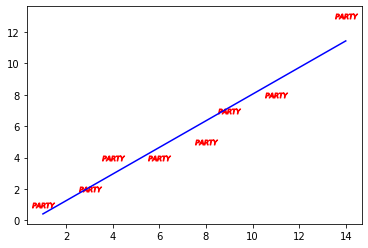

In [352]:
# Your code here.
lm = LinearRegression()

X = party['invited'].values.reshape(-1, 1)
Y = party['attended'].values.reshape(-1, 1)
reg = lm.fit(X, Y)
reg.predict(X)
Y_pred = lm.predict(X)
print(Y_pred)
plt.scatter(X, Y, marker = '$PARTY$', c = 'r', s = 500)
plt.plot(X, Y_pred, color='b')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [353]:
# Your response here.
##It's linear from the looks of it and positively inclined so the more people the dude invites, the more people come to his party, his hunch might've been incorrect
print(reg.coef_, r2_score(Y, Y_pred))
## There's a 15% chance of an invitee missing a party. His friends have plenty of time on their hands

[[0.84848485]] 0.9316696375519905


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [354]:
# Your response here. 
##Yes, and maybe if we remove the outlier(biggest party, probably his birthday or something and everyone came even though they didn't want to) we'll see a log function as the best fit, which means he was correct and his friends don't really like big parties. Sadly the number of parties is too low for a good estimation but we can eyeball it

##Will confirm if it's outlier:
(party['attended'].quantile(0.75) - party['attended'].quantile(0.25))*1.5 + party['attended'].quantile(0.75) < party.iloc[:]
## yes, the last one is an outlier

,invited,attended
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,True,True


In [355]:
party = party.iloc[:-1]

[[1.0075188 ]
 [2.37593985]
 [3.06015038]
 [4.42857143]
 [5.79699248]
 [6.48120301]
 [7.84962406]]


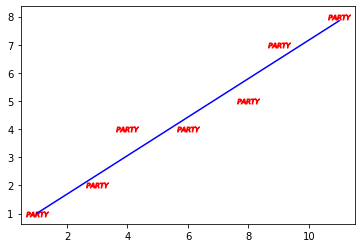

In [356]:
X = party['invited'].values.reshape(-1, 1)
Y = party['attended'].values.reshape(-1, 1)
reg = lm.fit(X, Y)
reg.predict(X)
Y_pred = lm.predict(X)
print(Y_pred)
plt.scatter(X, Y, marker = '$PARTY$', c = 'r', s = 500)
plt.plot(X, Y_pred, color='b')

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [357]:
# Your response here. 
## Nah, linear model still probably the best model, the only thing that changed is:
r2_score(Y, Y_pred)
reg.coef_
# So it seems that if we remove the dude's birthday ~ 1 in every 3 of his friends bail out on him
# But I want to add that a party with one invitation shouldn't also be considered a party. So...

array([[0.68421053]])

In [358]:
party = party.iloc[1:]

[[2.38078292]
 [3.06405694]
 [4.43060498]
 [5.79715302]
 [6.48042705]
 [7.84697509]]


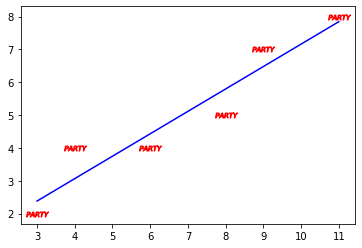

In [361]:
X = party['invited'].values.reshape(-1, 1)
Y = party['attended'].values.reshape(-1, 1)
reg = lm.fit(X, Y)
reg.predict(X)
Y_pred = lm.predict(X)
print(Y_pred)
plt.scatter(X, Y, marker = '$PARTY$', c = 'r', s = 500)
plt.plot(X, Y_pred, color='b')

In [364]:
r2_score(Y, Y_pred)
reg.coef_

array([[0.68327402]])

In [ ]:
## Not much changes except for the definition of party